# 4 신경망 학습


## 4.2 손실 함수


### 4.2.1 평균 제곱 오차

In [116]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [117]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [118]:
import numpy as np
# 예1: '2'일 확률이 가장 높다고 추정 (0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y1), np.array(t))

0.09750000000000003

In [119]:
# 예2:'7'일 확률이 가장 높다고 추정 (0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y2), np.array(t))

0.5975

### 4.2.2 교차 엔트로피 오차

In [120]:
def cross_entropy_error(y, t):  #자연로그
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) #y가 0이 되지 않도록 delta를 더하였음

In [121]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y1), np.array(t))

0.510825457099338

In [122]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y2), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습

미니배치: 훈련 데이터로부터 일부만 골라 학습 수행

미니배치 학습: 60000장의 훈련 데이터 중 100장을 무작위로 뽑아 그 100장을 사용해 학습함

In [123]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

#load_mnist 함수로 MNIST (훈련 데이터와 시험 데이터) 데이터셋을 읽음.
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [124]:
train_size = x_train.shape[0]   #60000개
batch_size = 10                 #10개

batch_mask = np.random.choice(train_size, batch_size) #batch_mask: 훈련 데이터에서 무작위로 10장만 빼내기
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [125]:
#0에서 60000 미만의 수 중에서 무작위로 10개 뽑기
np.random.choice(60000, 10)

array([  571, 57589, 53466, 18702, 45039, 10182,   954, 46612, 58991,
        2834])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [126]:
def cross_entropy_error(y, t):    #y는 신경망의 출력, t는 정답 레이블
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [127]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size  #t * np.log(y) 부분 구현

## 4.3 수치미분

### 4.3.1 미분

In [128]:
# 수치 미분: 아주 작은 차분으로 미분을 구하는 것
# 구간을 좀 더 넓힘으로써 차이가 좀 커져 값이 비교적 명확하게 나온다
# 앞으로 접선의 기울기는 이 식으로 구하기로 한다

# 개선된 수치미분 구현 (오차를 줄인)
def numerical_diff(f,x):
    h = 1e-4   #0.00001
    return (f(x + h) - f(x - h)) / (2*h)

### 4.3.2 수치 미분의 예

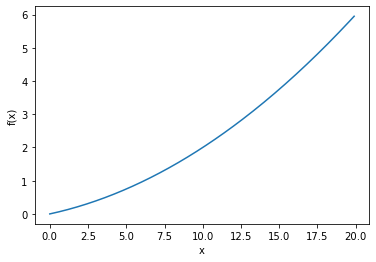

In [129]:
# 식 4.5: f(x)=0.01x**2 + 0.1x 그래프
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x 생성
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

x = 5, 10일때 미분 계산

In [130]:
numerical_diff(function_1, 5)

0.1999999999990898

In [131]:
numerical_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분
변수가 2개 이상인 식

In [132]:
# 편미분 구현 
def function_2(x):
    return x[0]**2 + x[1]**2     #numpy 배열을 제곱하여 더하는 방법
    # 또는 return np.sum(x**2)   #각각의 항들을 제곱하고 각항들을 더하는 방법

문제 1) x0=3, x1=4일 때 x0에 대한 편미분을 구하라

In [133]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제 2) x0=3, x1=4일 때 x1에 대한 편미분을 구하라

In [134]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기
기울기: 모든 변수의 편미분을 벡터로 정리한 것.

In [135]:
# 편미분 기울기 구현 
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)       # x와 형상이 같고 그 원소가 모두 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

위 함수를 이용하여 세 점 (3,4), (0.2), (3,0)에서 기울기 구하기

In [136]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [137]:
_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [138]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([6., 0.])

No handles with labels found to put in legend.


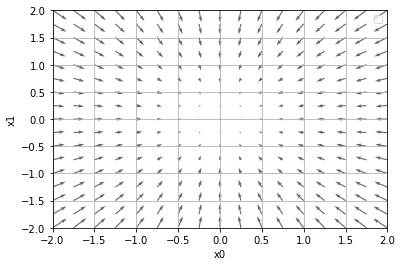

In [139]:
# 교재 소스 코드: gradient_2d.py
# 그림 4-9 f(x0, x1) = x0**2 + x1**2 의 기울기
# 기울기의 결과에 마이너스를 붙인 벡터 그리기

from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]) ) #모든 x, y 전체에서 구한다
    
plt.figure()
# 기울기에 마이너스 붙이는 부분 (방향으로 최솟값 가리킴)
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사법(경사 하강법)

경사 하강법 구현코드

In [140]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):  
    #f: 최적화하려는 함수, init_x: 초기값, lr: learning rate, step_num: 갱신 반복 회수
    x = init_x
    
    for i in range(step_num):           # 기울기에 학습률을 곱한 값으로 갱신 - step_num번 반복
        grad = numerical_gradient(f, x) # 함수의 기울기를 구하는 함수 
        x -= lr * grad                  # 마이너스 방향으로 가야 하므로 에타 값 빼기
    return x 

문제: 경사법으로 f(x0,x1) = x0 \*\* 2 + x1 \*\* 2의 최소값을 구하라

In [141]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

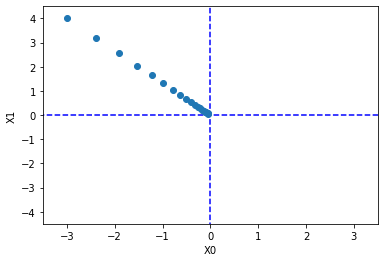

In [42]:
# 교재 소스 코드: gradient_method.py 
# 경사법을 이용한 갱신 과정 그래프
# 그림 4-10 f(x0, x1) = x0**2 + x1**2 의 갱신 과정 : 점선은 함수의 등고선을 나타낸다.

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    #초기값 (-3.0, 4.0)으로 설정 후 경사법을 사용해 최소값 구하기

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [142]:
# 학습률 크기에 따른 결과 비교 (Ir값 조작)
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [143]:
# 학습률이 너무 큰 예 : lr=10 : 너무 큰 값으로 발산
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [144]:
# 학습률이 너무 작은 예 : lr=1e-10 : 거의 갱신되지 않고 끝남
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 4.4.2 신경망에서의 기울기

In [145]:
# 교재 소스 코드: gradient_simplenet.py
# 신경망에 대한 기울기를 구하는 코드

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):             #예측 수행
        return np.dot(x, self.W)

    def loss(self, x, t):             #손실 함수의 값 구하기  #x는 입력 데이터, t는 정답 레이블
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [146]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 0.37566871 -0.24893338 -0.36570547]
 [ 0.11852927  0.17094041  1.76090337]]


In [147]:
x = np.array([0.6, 0.9])  #0.6, 0.9 입력값 주고 predict 수행
p = net.predict(x)
print(p)

[0.33207757 0.00448634 1.36538975]


In [148]:
np.argmax(p) # 최대값의 인덱스

2

In [149]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x,t)

0.4776341049885464

In [150]:
#최종 구현, gradient_simplenet.py 뒷부분
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W) #편미분값 출력 #loss 함수 호출됨

print(dW)

[[ 0.05156282  0.41826263 -0.46982545]
 [ 0.07734423  0.62739394 -0.70473818]]


w11: 손실함수를 줄이려면 양의 방향으로 갱신해야 함
w23: 손실함수를 줄이려면 음의 방향으로 갱신해야 함
-> w23이 더 중요한 가중치인 것을 알 수 있음

## 4.5 학습 알고리즘 구현하기


### 4.5.1 2층 신경망 클래스 구현하기
2층 신경망을 하나의 클래스로 구현: TwoLayerNet

In [155]:
# 교재 소스 코드: two_layer_net.py 
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}       #신경망의 매개변수 저장 딕셔너리  
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)  #1번째 층의 가중치
        self.params['b1'] = np.zeros(hidden_size)                                       #1번째 층의 편향
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) #2번째 층의 가중치
        self.params['b2'] = np.zeros(output_size)   #bias 값 0으로 초기화 (조정 x)      #2번째 층의 편향

    def predict(self, x):   #순전파로 추론하는 과정
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1     #1번째 층
        z1 = sigmoid(a1)        
        a2 = np.dot(z1, W2) + b2    #2번째 층
        y = softmax(a2)             #지분 처리
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    #추론한 것 중에 값이 큰 것을 알아내는 과정
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])   #y==t인 횟수 합해 전체 batch 행의 개수로 나누면 정확도
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):   #loss function에 대해 수치 미분한 값
        loss_W = lambda W: self.loss(x, t)   #실제로는 loss
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])  #w1 기준으로 미분
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])  #b1 기준으로 미분
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])  #w2 기준으로 미분
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])  #b2 기준으로 미분
        
        return grads
    
    #5장의 기법
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}   #갱신된 기울기 값을 저장하는 딕셔너리
        
        batch_num = x.shape[0] 
        
        # forward: 전개
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)   #히든 레이어
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)    #츨력 레이어
        
        # backward: 아직은 배우지 않은 backward 값 이용해 미분
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads  #기울기 갱신한 것을 리턴

In [156]:
# 2층 신경망 클래스 구현 예시
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [157]:
# predict 예시
x = np.random.rand(100, 784) # 더미 입력 데이터(100장)
y = net.predict(x)
print(y)

[[0.09469095 0.10732011 0.1032402  0.10217361 0.09061714 0.09882115
  0.10389184 0.09485593 0.09954793 0.10484113]
 [0.09432156 0.1076174  0.10323438 0.10179511 0.09068383 0.09857573
  0.10390768 0.09476709 0.09940846 0.10568876]
 [0.09479489 0.10746322 0.1034264  0.10171033 0.09052125 0.09882006
  0.10390681 0.094596   0.09927181 0.10548924]
 [0.09434453 0.10773229 0.10298614 0.10202065 0.0904096  0.09879052
  0.10456269 0.09461779 0.09927414 0.10526163]
 [0.09455852 0.10741859 0.10307086 0.10215174 0.09031983 0.09903662
  0.10399643 0.09491667 0.09933859 0.10519215]
 [0.09448244 0.10779409 0.10331563 0.10180675 0.09059428 0.09862383
  0.10374143 0.09464835 0.09953507 0.10545813]
 [0.09474039 0.107815   0.10350799 0.10192623 0.09043557 0.09850692
  0.10384437 0.09490878 0.09925827 0.10505648]
 [0.09497594 0.10742773 0.10343379 0.10182574 0.0905549  0.09882728
  0.10373999 0.0947256  0.09916832 0.10532072]
 [0.09466968 0.10753118 0.10320453 0.10195788 0.09042758 0.09877545
  0.10422288

In [154]:
x = np.random.rand(100, 784) #더미 입력 데이터(100장)
t = np.random.rand(100, 10)  #더미 정답 레이블(100장)

grads = net.numerical_gradient(x, t) #기울기 계산

print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기


In [158]:
# 교재 소스 코드: train_neuralnet.py

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []  #학습 에러 그리기
train_acc_list = []   #학습 데이터 정확도 그리기
test_acc_list = []    #테스트 데이터 정확도 그리기

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]  #기울기 값이 작아지는 방향으로 갱신
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)  #loss 한 번 더 계산
    train_loss_list.append(loss)           #따로 빈 list에 추가

    # 1에폭당 정확도 계산 (600번마다 한 번씩)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)         #이 지표로 학습하진 x
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7757, 0.7815
train acc, test acc | 0.8767166666666667, 0.8815
train acc, test acc | 0.8993333333333333, 0.9053
train acc, test acc | 0.9071333333333333, 0.9093
train acc, test acc | 0.9130166666666667, 0.9165
train acc, test acc | 0.9187833333333333, 0.9217
train acc, test acc | 0.92295, 0.9256
train acc, test acc | 0.9264833333333333, 0.9291
train acc, test acc | 0.9297666666666666, 0.9311
train acc, test acc | 0.9336333333333333, 0.9337
train acc, test acc | 0.9364, 0.937
train acc, test acc | 0.9389833333333333, 0.9385
train acc, test acc | 0.9411666666666667, 0.9407
train acc, test acc | 0.9425833333333333, 0.9427
train acc, test acc | 0.9450166666666666, 0.9446
train acc, test acc | 0.9469333333333333, 0.9453


### 4.5.3 시험 데이터로 평가하기

그래프 그리기

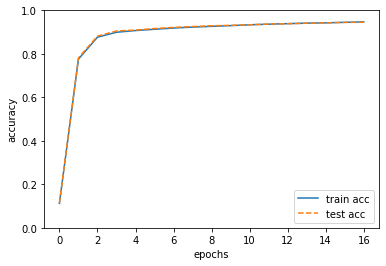

In [159]:
# 그림 4-12 훈련 데이터와 시험 데이터에 대한 정확도 추이
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()